## Intro Matplotlib
Author: Emmanuel Rodriguez

Date: 8 May 2022

Location: Fort Hancock, TX

emmanueljrodriguez.com

## World Development Indicators (WDI)

World Bank's compilation of global development data.

## Step 1: Initial exploration of the dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

Download dataset from https://datatopics.worldbank.org/world-development-indicators/?msclkid=905295b0cef211eca247786f37737c73

In [3]:
data = pd.read_csv('./WDI_csv/WDIData.csv') # Read .csv file into a DataFrame (multi-dimensional array w/rows and column labels)
data.shape # Get array size

(384370, 67)

This is a large dataset, let's explore what this data holds.

In [4]:
data.head(10) #Use the 'head' method to view the headers of the n rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN,NaN
5,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.112206,66.283426,67.080235,69.132292,70.928567,71.866136,73.332842,73.942949,NaN,NaN
6,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a three-dimensional dataset, where the dimensions are: country, indicator, and year.

### How many unique country names are there?

In [5]:
countries = data['Country Name'].unique().tolist() # Use the 'unique' method on the column of the dataframe that contains the country names 
len(countries)

266

### Do the number of country codes match the number of countries?

In [6]:
countryCodes = data['Country Code'].unique().tolist() # The 'unique()' method finds the unique names in the dataframe index
# 'Country Code' and returns an arrray, then the 'tolist()' method returns a list of the array values 
len(countryCodes)

266

### How many indicators are there?

In [7]:
indicators = data['Indicator Name'].unique().tolist()
len(indicators)

1445

In [8]:
# Cross-check with number of indicator codes
indicatorCodes = data['Indicator Code'].unique().tolist()
len(indicatorCodes)

1445

In [9]:
# List the environment variables created so far

%whos

Variable         Type         Data/Info
---------------------------------------
countries        list         n=266
countryCodes     list         n=266
data             DataFrame                           Co<...>384370 rows x 67 columns]
indicatorCodes   list         n=1445
indicators       list         n=1445
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random           module       <module 'random' from 'C:<...>aconda3\\lib\\random.py'>


### How many years of data do we have?

In [10]:
years = data.columns[4:-1] # Grab the column labels starting at col 4, then remove the last 'Unnamed' value
len(years)

62

In [11]:
print(years)

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [12]:
# Convert the index into a list
years = years.tolist()

In [13]:
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


### What's the range of years?

In [14]:
print(min(years), " to " , max(years))

1960  to  2021


## Matplotlib: Basic Plotting, Part 1

### Country and an indicator to explore:

USA and CO2 emissions per capita

In [15]:
# Create and set variables to hold indicator and country
hist_indicator = 'CO2 emissions (metric'
#hist_indicator = 'CO2 emissions \(metric' # Alternative, if regex is left as default True
hist_country = 'USA'

# Setup two masks using the string method 'contains()'
mask1 = data['Indicator Name'].str.contains(hist_indicator, regex=False) # Set the regex (Regular expression) arg to 
# False, treating str arg as a literal string.
# Literal string or string literal - When a string appears in the actual code of a program it is called a string literal.
# In the string above, the open paranthesis, which typically appears in the actual code - is causing errors in interpreting
# the string (where it ends/begins), therefore the string must be set as a literal string. See Gaddis, p. 35.
#mask1 = data['Indicator Name'].str.contains(hist_indicator) # By default regex is set to True.

mask2 = data['Country Code'].str.contains(hist_country)

# Create and set a temporary dataframe called stage to hold:
# A mask for all the rows for which the indicated name contains 'CO2 emissions'
# Another mask for the rows whose country code is the USA.
stage = data[mask1 & mask2]
print(len(stage))
print(type(stage))

1
<class 'pandas.core.frame.DataFrame'>


In [16]:
stage.head() # head() function returns the first n rows (default is 5) for the object

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875,NaN,NaN,NaN,NaN


### Handle missing data

In [17]:
# Use the dropna() function to drop missing data fields
stage = stage.dropna(axis=1) # Set axis parameter to 1 to drop columns with NaN, set it to 0 to drop rows with NaN 

### Plot indicator over time using Matplotlib

In [30]:
# Get the years
years = stage.columns[4:].tolist() # Get column labels starting at index 5 (or 4 implicit) to the last, 
# turn the index to a list of strings containing the years

#years

In [31]:
print(type(years))
print(years)
print(len(years))

<class 'list'>
['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
29


### How do I select a subset of a DataFrame?

Ref: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [21]:
stage['1990'] # Each column in a DataFrame is a Series. As a single column is selected, the return object is a pandas Series.

368668    19.409229
Name: 1990, dtype: float64

In [22]:
type(stage['1990']) # To verify the above statement

pandas.core.series.Series

In [23]:
stage[['1990']] # To select multiple columns, use a list of column names within the selection brackets. The inner square
# brackets define a Python list with column names, whereas the outer brackets are used to select the data 
# from a pandas DataFrame - this is known as 'fancy indexing'.

,1990
368668,19.409229


In [24]:
stage[['1990','1990']]

,1990,1990
368668,19.409229,19.409229


In [32]:
# Get the CO2 values
co2 = stage[years].values # Use the 'years' list to select the corresponding year columns

In [33]:
co2

array([[19.40922912, 19.00573561, 19.02508245, 19.2381088 , 19.28061081,
        19.25393761, 19.61109008, 20.34787297, 20.26688031, 20.10571961,
        20.4719331 , 20.17500468, 19.44947847, 19.50870471, 19.60357288,
        19.478026  , 18.9576435 , 19.05602695, 18.29480563, 16.81886848,
        17.43419587, 16.59940374, 15.77114462, 16.10295784, 16.02637907,
        15.53534211, 15.13174682, 14.80588242, 15.24087458]])

In [36]:
print(type(co2))
print(co2.shape)

<class 'numpy.ndarray'>
(1, 29)


In [35]:
#co2List = [int(co2) for co2 in co2]
#co2List

TypeError: only size-1 arrays can be converted to Python scalars

Only 'size-1' arrays... does this mean, the trailing dimension must be 1? Let find out...

In [37]:
co2 = np.transpose(co2)
print(type(co2))
print(len(co2))
print(co2.shape)

<class 'numpy.ndarray'>
29
(29, 1)


In [38]:
co2List = list(co2)

In [39]:
print(co2List)
print(type(co2List))
#print(co2List.shape)

[array([19.40922912]), array([19.00573561]), array([19.02508245]), array([19.2381088]), array([19.28061081]), array([19.25393761]), array([19.61109008]), array([20.34787297]), array([20.26688031]), array([20.10571961]), array([20.4719331]), array([20.17500468]), array([19.44947847]), array([19.50870471]), array([19.60357288]), array([19.478026]), array([18.9576435]), array([19.05602695]), array([18.29480563]), array([16.81886848]), array([17.43419587]), array([16.59940374]), array([15.77114462]), array([16.10295784]), array([16.02637907]), array([15.53534211]), array([15.13174682]), array([14.80588242]), array([15.24087458])]
<class 'list'>


This gives a list filled with 1x1 arrays... not quite what I was looking for...

In [40]:
co2List = [float(co2) for co2 in co2]
co2List

[19.4092291175092,
 19.005735608603,
 19.0250824516401,
 19.2381087954324,
 19.280610810030197,
 19.2539376140725,
 19.611090076245198,
 20.3478729686016,
 20.266880306249,
 20.105719610091697,
 20.471933095298102,
 20.1750046772639,
 19.4494784745785,
 19.5087047137039,
 19.603572883438698,
 19.478026004217803,
 18.9576435024889,
 19.0560269540732,
 18.2948056259689,
 16.8188684811099,
 17.4341958733314,
 16.599403740534,
 15.7711446187591,
 16.1029578354008,
 16.0263790723251,
 15.535342110601,
 15.131746815811901,
 14.8058824221278,
 15.2408745833286]

Okay, much better, so a size-1 array, is a column vector. These are the only types of arrays that can be converted to Python scalars.

In [42]:
print(type(co2List))
print(len(co2List))

<class 'list'>
29


In [43]:
# Change years from string to integer to facilitate plotting...
years = [int(years) for years in years]
years

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

## Plot

(10.0, 20.0)

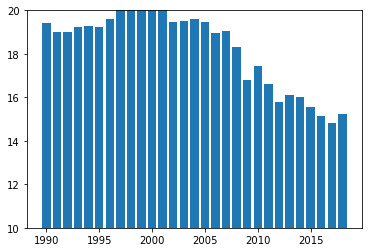

In [44]:
plt.bar(years, co2List) # Test the plot, okay, so plotting two lists works....
plt.ylim([10,20]) # Set y-axis range limit

It can be seen that CO2 emssions has dropped over time, but the graphic should be more appealing and interpretable.

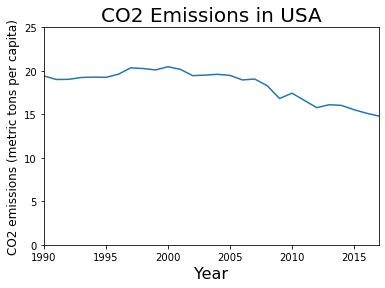

In [45]:
# Switch to a line plot
plt.plot(years, co2List)

# Label the axes
plt.xlabel('Year', fontsize = 16) # xlabel is a method on the plot
plt.ylabel(stage['Indicator Name'].iloc[0], fontsize = 12)

# Title
plt.title('CO2 Emissions in USA', fontsize = 20)

# Adjust the axis
plt.axis([1990,2017,0,25]);

# Adjust x-axis ticks
#plt.xticks(np.arange(min(years), max(years), 3));

### Histogram to explore distribution

### Calculate bins using square-root method
$ k = \lceil sqrt(n) \rceil $

Where $\lceil$ and $\rceil$ indicate the celing function (the smallest integer >= input argument), and $n$ is the sample size.

In [46]:
import math
k = math.ceil(math.sqrt(len(co2List)))
k

6

Text(0, 0.5, '# of Years')

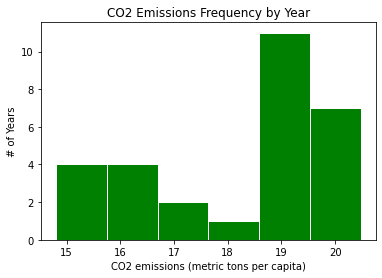

In [47]:
plt.hist(co2List, k, facecolor = 'green', edgecolor = 'white')

plt.title('CO2 Emissions Frequency by Year')
plt.xlabel(stage['Indicator Name'].iloc[0])
plt.ylabel('# of Years')
#plt.grid(True)

The USA has several years where its CO2 emissions were 19 metric tons per capita or greater.

### How does the USA CO2 emissions compare to other countries?

In [48]:
test = data['2017']
print(test)
print(test.shape)

0            18.491344
1             7.180364
2            38.670044
3            40.261358
4            25.345111
              ...     
384365             NaN
384366             NaN
384367             NaN
384368       59.900000
384369    12000.000000
Name: 2017, Length: 384370, dtype: float64
(384370,)


In [49]:
test2 = data['Indicator Name'].str.contains('CO2 emissions (metric', regex = False)
#test2 = data['Indicator Name']
print(test2)
print(type(test2))
print(test2.shape)

0         False
1         False
2         False
3         False
4         False
          ...  
384365    False
384366    False
384367    False
384368    False
384369    False
Name: Indicator Name, Length: 384370, dtype: bool
<class 'pandas.core.series.Series'>
(384370,)


In [50]:
# Is there True elements in test2? 
True in test2

True

In [51]:
co2Only = data[test2]
print(co2Only)
print(type(co2Only))
print(co2Only.shape)
print(co2Only.size)
print(co2Only.ndim)

                          Country Name Country Code  \
193        Africa Eastern and Southern          AFE   
1638        Africa Western and Central          AFW   
3083                        Arab World          ARB   
4528            Caribbean small states          CSS   
5973    Central Europe and the Baltics          CEB   
...                                ...          ...   
377338           Virgin Islands (U.S.)          VIR   
378783              West Bank and Gaza          PSE   
380228                     Yemen, Rep.          YEM   
381673                          Zambia          ZMB   
383118                        Zimbabwe          ZWE   

                                Indicator Name  Indicator Code  1960  1961  \
193     CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   
1638    CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   
3083    CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   
4528    CO2 emissions (metr

In [52]:
data['2018'].dropna(axis=0)
print(type(data['2018'].dropna(axis=0)))

<class 'pandas.core.series.Series'>


In [53]:
# Select CO2 emissions for all countries for the last year in the range of the current analysis (2017).
hist_indicator = 'CO2 emissions (metric'
hist_year = '2018'

mask1 = data['Indicator Name'].str.contains(hist_indicator, regex = False) # The column indicator 'Indicator Name' found
# in 'data' DataFrame with elements that contain the string 'x'.
#mask2 = data['Year'].isin([hist_year]) # use isin() method
#mask2 = data['2017']
data2018 = data[hist_year] # Query only the specified year

#mask2 = data[hist_year].dropna(axis=0)

# Apply mask
co2_2018 = data2018[mask1].dropna(axis=0) # Drop ROWS that contain NaN
#co2_2017 = data[mask1 & mask2]
print(co2_2018.head())
print(type(co2_2018)) # The type of object, and the class that it's derived from
print(co2_2018.shape) # a tuple of the shape of the underlying data.
print(co2_2018.dtype) # dtype object of the underlying data.
print(co2_2018.ndim) # # of dimensions of the underlying data.
print(co2_2018.size) # # of elements in the underlying data.
print(co2_2018.index) # The index (axis labels) of the Series.

193     0.933541
1638    0.515544
3083    4.438716
4528    5.017034
5973    6.597232
Name: 2018, dtype: float64
<class 'pandas.core.series.Series'>
(239,)
float64
1
239
Int64Index([   193,   1638,   3083,   4528,   5973,   7418,   8863,  10308,
             11753,  13198,
            ...
            367223, 368668, 370113, 371558, 373003, 374448, 375893, 380228,
            381673, 383118],
           dtype='int64', length=239)


In [54]:
# Okay, so now I've got a pandas Series of the CO2 emissions per capita for all countries in the dataset for the year 2018.
# Now what? Plot the data to visualize how the US compares to others... duh

#plt.bar(country, CO2 emissions)
# How to get country? I need a way to query the indices from co2_2018, i.e., I need the KEYS
countryKeys = co2_2018.keys() # use dictionary-like Python method keys() to query
print(countryKeys.shape)
print(countryKeys.dtype)
print(countryKeys.ndim)
print(countryKeys.size)
print(type(countryKeys))

(239,)
int64
1
239
<class 'pandas.core.indexes.numeric.Int64Index'>


In [55]:
countries = data['Country Name'].loc[countryKeys] # Query the column 'Country Name' in DataFrame 'data', and slice into it
# using the loc[] attribute that slices by referencing the explicit index (which is the index assigned label found in the
# dataframe), whereas an implicit Python-style index would reference the index from the array dimensions.
countries

193          Africa Eastern and Southern
1638          Africa Western and Central
3083                          Arab World
4528              Caribbean small states
5973      Central Europe and the Baltics
                       ...              
374448                     Venezuela, RB
375893                           Vietnam
380228                       Yemen, Rep.
381673                            Zambia
383118                          Zimbabwe
Name: Country Name, Length: 239, dtype: object

<BarContainer object of 239 artists>

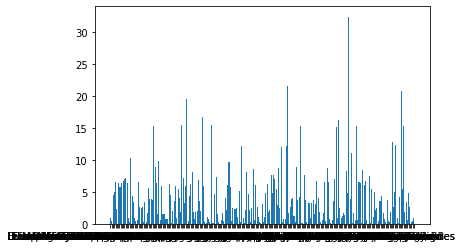

In [56]:
# Raw data plot
plt.bar(countries, co2_2018)

In [57]:
# What is the CO2 emissions of the USA?
#USAkey = countries[193]
#USAkey = countries.keys('Africa Eastern and Southern')

# Construct a new dataframe
df = pd.DataFrame({'Country': countries,'CO2 emissions per capita - 2018': co2_2018})

print(type(df))
print(len(df))
print(df.shape)
df

<class 'pandas.core.frame.DataFrame'>
239
(239, 2)


,Country,CO2 emissions per capita - 2018
193,Africa Eastern and Southern,0.933541
1638,Africa Western and Central,0.515544
3083,Arab World,4.438716
4528,Caribbean small states,5.017034
5973,Central Europe and the Baltics,6.597232
...,...,...
374448,"Venezuela, RB",4.782755
375893,Vietnam,2.698806
380228,"Yemen, Rep.",0.326682
381673,Zambia,0.446065


In [58]:
# Masking - filter out USA
USA_emissions = df[(df['Country'] == 'United States')]
USA_emissions

,Country,CO2 emissions per capita - 2018
368668,United States,15.240875


In [59]:
# Extract value
USA_emissionsValue = USA_emissions.iloc[0,1] # Use the iloc[] attribute to slice into the dataframe by referencing 
# the implicit Python-style index, index 0 refers to row 1, index 1 refers to column 2
#USA_emissions.loc[368668]
USA_emissionsValue

15.2408745833286

In [60]:
# What is the country(ies) with the heighest emissions?
highestCO2_countries = df[(df['CO2 emissions per capita - 2018'] > 20)]
highestCO2_countries

,Country,CO2 emissions per capita - 2018
224168,Kuwait,21.622724
300753,Qatar,32.415639
365778,United Arab Emirates,20.797498


In [61]:
Kuwait_eV = highestCO2_countries.iloc[0,1]
Qatar_eV = highestCO2_countries.iloc[1,1]
UAE_eV = highestCO2_countries.iloc[2,1]

In [62]:
# Where is Mexico in all of this?
Mx_emissions = df[(df['Country'] == 'Mexico')]
Mx_emissions

,Country,CO2 emissions per capita - 2018
254513,Mexico,3.741478


In [63]:
Mx_eV = Mx_emissions.iloc[0,1]

Text(0.5, 1.0, 'Histogram of CO2 Emissions per Capita')

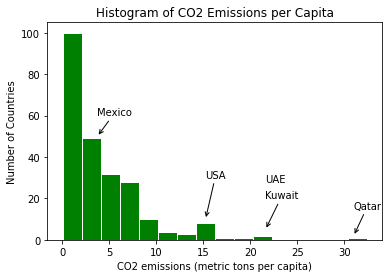

In [64]:
# Histogram of the emissions per capita by country

# Create just a figure and only one subplot
fig, ax = plt.subplots() # subplots returns a tuple with the figure, axis attributes
# What is a tuple? A tuple is a type of Python array. It is a collection which is ordered and unchangeable. Allows
# duplicate members.
# A list is ordered and changeable. Allows duplicate members.
# https://www.w3schools.com/python/python_tuples.asp
# Even though only one plot is being created, subplots() function is used because this function returns two arguments
# figure and axes.Axes, where the latter can be either a single Axes object or an array of Axes objects if more than one
# subplot was created.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots

# Annotate the figure with an arrow indicating where the USA lies in the distribution
# annotate is a Python method in matplotlib.axes.Axes.annotate;
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html?highlight=annotate#matplotlib.axes.Axes.annotate
# Annotate the point xy with text text.
ax.annotate("USA",
           xy=(USA_emissionsValue, 10), xycoords='data',
           xytext=(USA_emissionsValue,30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )

ax.annotate("Kuwait",
           xy=(Kuwait_eV, 5), xycoords = 'data',
           xytext=(Kuwait_eV, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="arc3"),
           )

ax.annotate("UAE",
           xy=(Kuwait_eV, 5), xycoords = 'data',
           xytext=(Kuwait_eV, 28), textcoords='data',
           )

ax.annotate("Qatar",
           xy=(Qatar_eV-1.4, 2), xycoords = 'data',
           xytext=(Qatar_eV-1.4, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
           )
# Subtracting 1.4 from the Qatar value to shift the text to the left.

ax.annotate("Mexico",
           xy=(Mx_eV, 50), xycoords = 'data',
           xytext=(Mx_eV, 60), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
           )
            
# Note that 'data' in xycoords and textcoords is simply the option assigned to those two parameters, it is not referring
# to the Pandas dataframe 'data' -- see the doc.

# # of bins
k = math.ceil(math.sqrt(len(co2_2018)))

plt.hist(co2_2018, k, facecolor = 'green', edgecolor = 'white')

plt.xlabel(stage['Indicator Name'].iloc[0]) # Query column 'Indicator Name' in the stage DataFrame, and extract the location
# of element 0 by using the implicit index 0 (Pthon-style index, where 0 references element 1 in the array)

plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 Emissions per Capita')

## Matplotlib: Basic Plotting, Part 2

### Relationship between GDP and CO2 emissions in USA

What is GDP? -- A monetary measure of the market value of all the final goods and services produced in a specific time period by the country being queried.

In [65]:
# Select GDP per capita for the US
hist_indicator = 'GDP per capita (constant 2015'
hist_country = 'USA'

mask1 = data['Indicator Name'].str.contains(hist_indicator, regex=False)
mask2 = data['Country Code'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]

In [66]:
gdp_stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
368946,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,19135.268182,19253.547329,20116.235124,20701.269947,21599.818705,22696.678583,...,54604.130054,55574.356825,56863.371496,57418.933846,58387.775808,59821.592274,60836.771454,58203.379006,NaN,NaN


In [67]:
# Remove columns that contain NaN values
gdp_stage = gdp_stage.dropna(axis=1)
gdp_stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
368946,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,19135.268182,19253.547329,20116.235124,20701.269947,21599.818705,22696.678583,...,53190.231121,53989.24834,54604.130054,55574.356825,56863.371496,57418.933846,58387.775808,59821.592274,60836.771454,58203.379006


### First, what is the trend of GDP of the USA?

In [68]:
# Line plot
# Plot plt.plot(years, gdp_value)

# Get the years
gdp_years =  gdp_stage.columns[4:].tolist()
print(len(gdp_years))
# Range:
print("Range:", min(gdp_years), " to " , max(gdp_years))

61
Range: 1960  to  2020


In [69]:
# Get the GDP values
gdp = gdp_stage[gdp_years].values # Use the years list to select the corresponding values; this expression will output
# a numpy array
print(len(gdp))
print(type(gdp))
print(gdp.shape)

1
<class 'numpy.ndarray'>
(1, 61)


In [70]:
# To plot, both x and y must have same first dimension, therefore gdp needs to be transposed
gdp = gdp.T
print(gdp.shape)

(61, 1)


In [71]:
# To plot, convert the string list to an integer list
gdp_years = [int(gdp_years) for gdp_years in gdp_years]
print(type(gdp_years))
print(len(gdp_years))
print(type(gdp_years[0]))

<class 'list'>
61
<class 'int'>


Text(0.5, 1.0, 'US GDP per Capita')

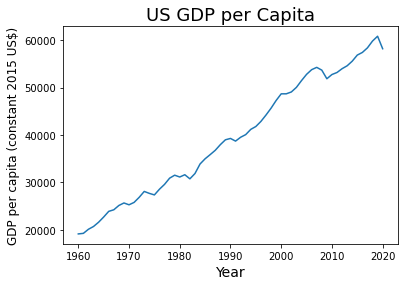

In [72]:
plt.plot(gdp_years,gdp)

plt.xlabel('Year', fontsize=14)
plt.ylabel(gdp_stage['Indicator Name'].iloc[0], fontsize=12)

plt.title('US GDP per Capita', fontsize = 18)

Is there a correlation between GDP per capita and CO2 emissions?
A scatter plot will be used to investigate this question.

### ScatterPlot to evalute GDP against CO2 emissions per capita.

Ensure time frames for both indicators match, as a scatterplot requires that the length of the arrays be equal.

In [73]:
#print("GDP min year = ", gdp_stage.columns[4], "max = ", gdp_stage.columns[-2])
print("GDP range:", min(gdp_years), " to " , max(gdp_years))
print("CO2 emissions range:", min(years), " to " , max(years))

GDP range: 1960  to  2020
CO2 emissions range: 1990  to  2018


In [74]:
# Let's truncate (trim off) the gdp_stage on the left and right to match the CO2 emissions indicator range:
# How do I do this?? How do I slice this range?

test = gdp_stage[['1990','1991']]
print(test)
# Fancy indexing works well, but it only seems to accept lists?
list1 = list(['1990','1991'])
test2 = gdp_stage[list1]
print(test2)

# Okay, cool. Now I need to figure out a way to create a list by specifying the range of years...
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#slicing-ranges

# pandas provides a suite of methods in order to have purely label based indexing. The .loc attribute is the primary
# access method. Contrary to typical Python slices, both the start and the stop are included, when present in the index.
test3 = gdp_stage.loc[:,'1960':'1962'] # Because I'm slicing columns, place the indices in the column location (after ,).
print(test3)
print(type(gdp_stage))


#gdp_stage_trunc = gdp_stage[['1990','2017']] # When using Double[], this is indexing function is referred to as fancy indexing
# or label-based
#gdp_stage_trunc = gdp_stage.loc['1990':'2017']
gdp_stage_trunc = gdp_stage.columns[4:6]
gdp_stage_trunc
#gdp_stage_trunc.head()

               1990          1991
368946  39278.59535  38715.261688
               1990          1991
368946  39278.59535  38715.261688
                1960          1961          1962
368946  19135.268182  19253.547329  20116.235124
<class 'pandas.core.frame.DataFrame'>


Index(['1960', '1961'], dtype='object')

In [75]:
# Let's truncate (trim off) the gdp_stage on the left and right to match the CO2 emissions indicator range:
# How do I do this?? How do I slice this range?

gdp_stage_trunc = gdp_stage.loc[:,'1990':'2018'] # Because I'm slicing columns, place the indices in the column location (after ,).
gdp_stage_trunc

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
368946,39278.59535,38715.261688,39526.970805,40082.604815,41189.238357,41794.192213,42869.24717,44212.167041,45658.136598,47282.284676,...,51869.706308,52759.998081,53190.231121,53989.24834,54604.130054,55574.356825,56863.371496,57418.933846,58387.775808,59821.592274


In [76]:
stage

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,19.409229,19.005736,19.025082,19.238109,19.280611,19.253938,...,16.818868,17.434196,16.599404,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875


In [77]:
# Okay, now I need to get the values from both the gdp stage and the co2 stage.

# gdp stage values
gdp_values = gdp_stage_trunc.values
print(type(gdp_values))
print(gdp_values.shape)
gdp_values = gdp_values.T
print(gdp_values.shape)

<class 'numpy.ndarray'>
(1, 29)
(29, 1)


In [78]:
# co2 stage values
# Don't I have these already??
co2_values = stage.loc[:,'1990':].values
print(type(co2_values))
print(co2_values.shape)
co2_values = co2_values.T
print(co2_values.shape)

<class 'numpy.ndarray'>
(1, 29)
(29, 1)


Text(0.5, 1.0, 'CO2 Emissions vs. GDP (per capita)')

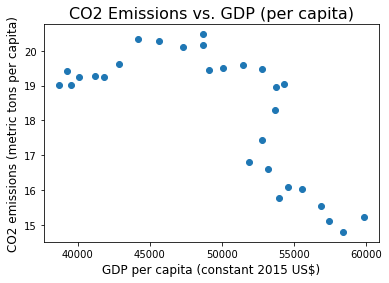

In [80]:
# Scatter plot
plt.scatter(gdp_values, co2_values)

plt.xlabel(gdp_stage['Indicator Name'].iloc[0], fontsize=12)
plt.ylabel(stage['Indicator Name'].iloc[0], fontsize=12)
plt.title('CO2 Emissions vs. GDP (per capita)', fontsize=16)

There doesn't seem to be a very strong correlation between these two indicators; this can be determined more objectively by calculating the correlation.

In [81]:
corr = np.corrcoef(co2_values, gdp_values)
corr

C:\Users\ejoaq\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ejoaq\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ejoaq\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [101]:
print(type(gdp_values))
print(type(co2_values))
print(gdp_values.shape)
print(co2_values.shape)
print(gdp_values)
print(co2_values)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(29, 1)
(29, 1)
[[39278.59534979]
 [38715.26168764]
 [39526.97080471]
 [40082.60481535]
 [41189.23835729]
 [41794.19221265]
 [42869.24716957]
 [44212.16704137]
 [45658.13659762]
 [47282.28467603]
 [48689.03128986]
 [48690.80794082]
 [49081.35878765]
 [50053.6241041 ]
 [51476.48878607]
 [52796.08981626]
 [53782.29728816]
 [54272.71955259]
 [53688.36513514]
 [51869.70630837]
 [52759.99808074]
 [53190.2311214 ]
 [53989.24833969]
 [54604.13005448]
 [55574.35682485]
 [56863.37149577]
 [57418.93384645]
 [58387.77580836]
 [59821.59227355]]
[[19.40922912]
 [19.00573561]
 [19.02508245]
 [19.2381088 ]
 [19.28061081]
 [19.25393761]
 [19.61109008]
 [20.34787297]
 [20.26688031]
 [20.10571961]
 [20.4719331 ]
 [20.17500468]
 [19.44947847]
 [19.50870471]
 [19.60357288]
 [19.478026  ]
 [18.9576435 ]
 [19.05602695]
 [18.29480563]
 [16.81886848]
 [17.43419587]
 [16.59940374]
 [15.77114462]
 [16.10295784]
 [16.02637907]
 [15.53534211]
 [15.13174682]
 [14.805

In [104]:
# What I need to do is to convert the above array of array elements (?) into an array of float elements
gdp_values = [float(gdp_values) for gdp_values in gdp_values]
print(type(gdp_values[0]))
print((gdp_values[0]))

<class 'float'>
39278.5953497875


In [105]:
co2_values = [float(co2_values) for co2_values in co2_values]
print(type(co2_values))
print(len(co2_values))
print(type(co2_values[0]))
print(co2_values[0])

<class 'list'>
29
<class 'float'>
19.4092291175092


In [106]:
co2Series = pd.Series(co2_values)
print(type(co2Series))
print(len(co2Series))
print(co2Series.shape)

<class 'pandas.core.series.Series'>
29
(29,)


In [109]:
gdpSeries = pd.Series(gdp_values)
print(type(gdpSeries))
print(len(gdpSeries))
print(gdpSeries.shape)

<class 'pandas.core.series.Series'>
29
(29,)


In [112]:
# Construct dictionary from the two Series'.
# What is a dictionary? - Dictionaries are used to store data values in key:value pairs.
d = {'GDP':gdpSeries, 'CO2':co2Series}
d

{'GDP': 0     39278.595350
 1     38715.261688
 2     39526.970805
 3     40082.604815
 4     41189.238357
 5     41794.192213
 6     42869.247170
 7     44212.167041
 8     45658.136598
 9     47282.284676
 10    48689.031290
 11    48690.807941
 12    49081.358788
 13    50053.624104
 14    51476.488786
 15    52796.089816
 16    53782.297288
 17    54272.719553
 18    53688.365135
 19    51869.706308
 20    52759.998081
 21    53190.231121
 22    53989.248340
 23    54604.130054
 24    55574.356825
 25    56863.371496
 26    57418.933846
 27    58387.775808
 28    59821.592274
 dtype: float64,
 'CO2': 0     19.409229
 1     19.005736
 2     19.025082
 3     19.238109
 4     19.280611
 5     19.253938
 6     19.611090
 7     20.347873
 8     20.266880
 9     20.105720
 10    20.471933
 11    20.175005
 12    19.449478
 13    19.508705
 14    19.603573
 15    19.478026
 16    18.957644
 17    19.056027
 18    18.294806
 19    16.818868
 20    17.434196
 21    16.599404
 22    15.77114

In [113]:
# Construct the DataFrame from the dictionary
newdf = pd.DataFrame(data=d)
newdf

,GDP,CO2
0,39278.595350,19.409229
1,38715.261688,19.005736
2,39526.970805,19.025082
3,40082.604815,19.238109
4,41189.238357,19.280611
5,41794.192213,19.253938
6,42869.247170,19.611090
7,44212.167041,20.347873
8,45658.136598,20.266880
9,47282.284676,20.105720


In [117]:
# Compute correlation using the .corr method
newdf.corr(method='pearson')

,GDP,CO2
GDP,1.000000,-0.703146
CO2,-0.703146,1.000000


In [118]:
# Alternatively, compute corr using the Series.corr method
gdpSeries.corr(co2Series, method='pearson')

-0.7031462424574285

In the correlation matrix, the main diagonal represents each variable being correlated with itself, hence yielding a value of 1. 
The other diagonal represents the correlation between the two variables, a values of -0.70 indicates a negative and relatively strong correlation. E.g., as CO2 emissions decrease, GDP per capita increases - it is critical to note that this conclusion is based off a relatively short time-frame (1990 - 2018, 28 years) and in order to make this claim substantial a longer time period (>50 years) should be sampled.